In [43]:
import numpy as np
import pandas as pd
import os

In [44]:
# Read traffic data
traffic_df = pd.read_csv('trafikkdata.csv', sep="[|;]", engine='python')
traffic_df

,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Trafikkmengde,...,Ikke gyldig lengde,Lengdekvalitetsgrad (%),"< 5,6m",">= 5,6m","5,6m - 7,6m","7,6m - 12,5m","12,5m - 16,0m",">= 16,0m","16,0m - 24,0m",">= 24,0m"
0,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,1,-,...,-,-,-,-,-,-,-,-,-,-
1,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,2,-,...,-,-,-,-,-,-,-,-,-,-
2,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,Totalt i retning Danmarksplass,-,...,-,-,-,-,-,-,-,-,-,-
3,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,Totalt i retning Florida,-,...,-,-,-,-,-,-,-,-,-,-
4,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2015-07-16T15:00+02:00,2015-07-16T16:00+02:00,2015-07-16,15:00,16:00,Totalt,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348635,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2023-07-01T23:00+02:00,2023-07-02T00:00+02:00,2023-07-01,23:00,00:00,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348636,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2023-07-01T23:00+02:00,2023-07-02T00:00+02:00,2023-07-01,23:00,00:00,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348637,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2023-07-01T23:00+02:00,2023-07-02T00:00+02:00,2023-07-01,23:00,00:00,Totalt i retning Danmarksplass,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348638,17510B2483952,Gamle Nygårdsbru sykkel,KV256 S2D1 m75,2023-07-01T23:00+02:00,2023-07-02T00:00+02:00,2023-07-01,23:00,00:00,Totalt i retning Florida,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Check which columns the Felt columns contain
unique_vals = traffic_df["Felt"].unique()

# Only keep sum columns
traffic_df = traffic_df[traffic_df['Felt'] == 'Totalt']
unique_vals

array(['1', '2', 'Totalt i retning Danmarksplass',
       'Totalt i retning Florida', 'Totalt'], dtype=object)

In [46]:
# Replace missing values with nan
traffic_df['Trafikkmengde'] = traffic_df['Trafikkmengde'].replace('-', np.nan)

C:\Users\Aurora Ingebrigtsen\AppData\Local\Temp\ipykernel_46600\930369554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df['Trafikkmengde'] = traffic_df['Trafikkmengde'].replace('-', np.nan)


In [47]:
# Drop unecessary columns
traffic_df = traffic_df[['Dato','Fra tidspunkt','Trafikkmengde']] # må finne ut om jeg vil bruke fra eller til

In [48]:
# Make a single DateTime column
traffic_df['Tidspunkt'] = pd.to_datetime(traffic_df['Dato'] + ' ' + traffic_df['Fra tidspunkt'])

traffic_df = traffic_df[['Trafikkmengde', 'Tidspunkt']]

traffic_df.set_index('Tidspunkt', inplace=True)

traffic_df

,Trafikkmengde
Tidspunkt,
2015-07-16 15:00:00,NaN
2015-07-16 16:00:00,101
2015-07-16 17:00:00,79
2015-07-16 18:00:00,56
2015-07-16 19:00:00,45
...,...
2023-07-01 19:00:00,NaN
2023-07-01 20:00:00,NaN
2023-07-01 21:00:00,NaN


In [49]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69728 entries, 2015-07-16 15:00:00 to 2023-07-01 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Trafikkmengde  65250 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [50]:
# Change trafikkmengde to float dtype (not int to be able to have nan values)
traffic_df = traffic_df.astype({'Trafikkmengde':'float'})

In [51]:
traffic_df.shape

(69728, 1)

In [52]:
traffic_df.describe()

,Trafikkmengde
count,65250.000000
mean,50.380552
std,69.841572
min,0.000000
25%,5.000000
50%,25.000000
75%,64.000000
max,608.000000


In [53]:
folder_path = "weather_data"
csv_files = [f for f in os.listdir('weather_data/')]
weather_df = pd.DataFrame()

In [54]:
# Read weather data
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    weather_df = pd.concat([weather_df, df], ignore_index=True)
weather_df.head()

,Dato,Tid,Globalstraling,Solskinstid,Lufttemperatur,Vindretning,Vindstyrke,Lufttrykk,Vindkast,Relativ luftfuktighet
0,2010-01-01,00:00,0.0,0.0,-4.6,130.0,1.1,999.0,NaN,NaN
1,2010-01-01,00:10,-0.7,0.0,-4.1,158.0,1.6,999.2,NaN,NaN
2,2010-01-01,00:20,0.0,0.0,-3.5,167.0,1.3,999.0,NaN,NaN
3,2010-01-01,00:30,0.0,0.0,-4.1,151.0,0.7,999.0,NaN,NaN
4,2010-01-01,00:40,-0.7,0.0,-4.4,148.0,0.8,998.8,NaN,NaN


In [55]:
# proportion of the weather data that contains Relativ luftfuktighet
proportion = weather_df[weather_df["Dato"] >= "2022-01-01"].shape[0] / weather_df.shape[0]
proportion

0.11075391168620219

In [56]:
# where did vindkast start being measured?
start_vindkast = weather_df[weather_df["Vindkast"].notna()]
start_vindkast

# How many vindkast values are measured after this? And how many total measures are there after this?
total_vindkast_measures = start_vindkast.shape[0]
total_measures = weather_df[weather_df["Dato"] >= "2015-01-08"].shape[0]
print(f'Total measures overall: {total_measures}\nTotal vindkast measures: {total_vindkast_measures}\nDifference: {total_measures-total_vindkast_measures}')



Total measures overall: 445746
Total vindkast measures: 445653
Difference: 93


In [57]:
weather_df = weather_df.drop(columns=['Relativ luftfuktighet'])

In [58]:
# Make Datetime column
weather_df['Tidspunkt'] = pd.to_datetime(weather_df['Dato'] + ' ' + weather_df['Tid'])
weather_df = weather_df.drop(columns=['Dato', 'Tid'])

In [59]:
# Check for duplicat Tidspunkt values
duplicates = weather_df.duplicated().any()
duplicates

False

In [60]:
weather_df.set_index('Tidspunkt', inplace=True)

In [61]:
# Change 9999 vals to NaN
weather_df = weather_df.replace(9999.99, np.nan)

In [62]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709221 entries, 2010-01-01 00:00:00 to 2023-06-30 23:50:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Globalstraling  703052 non-null  float64
 1   Solskinstid     702942 non-null  float64
 2   Lufttemperatur  704893 non-null  float64
 3   Vindretning     704655 non-null  float64
 4   Vindstyrke      704899 non-null  float64
 5   Lufttrykk       705109 non-null  float64
 6   Vindkast        443083 non-null  float64
dtypes: float64(7)
memory usage: 43.3 MB


In [63]:
# Make datetime column hourly instead of each 10 min
resampled_df = weather_df.resample('H').agg(
    {'Solskinstid':'sum', 'Lufttemperatur': 'mean', 'Vindstyrke': 'mean', 'Lufttrykk': 'mean', 'Vindkast': 'mean', 'Globalstraling': 'mean', 'Vindretning': 'mean' })

In [64]:
# Check that new values make sense, ex. that max solskinstid <= 60
resampled_df.describe()

,Solskinstid,Lufttemperatur,Vindstyrke,Lufttrykk,Vindkast,Globalstraling,Vindretning
count,118296.000000,117862.000000,117865.000000,117864.000000,73916.000000,117514.000000,117869.000000
mean,7.604004,8.304543,3.055033,1004.655930,5.245482,90.560700,203.208774
std,18.008487,5.840336,2.077804,12.469656,3.483294,167.251092,75.895462
min,0.000000,-10.850000,0.000000,942.866667,0.000000,-3.983333,2.000000
25%,0.000000,4.066667,1.416667,997.250000,2.500000,-0.350000,147.833333
50%,0.000000,8.066667,2.633333,1005.666667,4.550000,5.833333,164.833333
75%,0.000000,12.566667,4.216667,1013.133333,7.150000,100.450000,288.333333
max,60.000000,31.833333,35.200000,1047.600000,28.950000,5396.966667,360.000000


In [65]:
merged_df = traffic_df.merge(resampled_df, left_index=True, right_index=True) # must consider if i want to left or right join
merged_df

,Trafikkmengde,Solskinstid,Lufttemperatur,Vindstyrke,Lufttrykk,Vindkast,Globalstraling,Vindretning
Tidspunkt,,,,,,,,
2015-07-16 15:00:00,NaN,43.4,13.900000,4.083333,1014.433333,6.70,504.400000,319.166667
2015-07-16 16:00:00,101.0,48.7,13.733333,4.333333,1014.400000,7.20,432.833333,317.500000
2015-07-16 17:00:00,79.0,60.0,13.866667,3.933333,1014.066667,6.55,378.400000,318.166667
2015-07-16 18:00:00,56.0,60.0,13.216667,4.233333,1013.966667,7.15,212.583333,319.833333
2015-07-16 19:00:00,45.0,60.0,12.683333,2.950000,1014.100000,5.45,79.750000,323.500000
...,...,...,...,...,...,...,...,...
2023-06-30 19:00:00,NaN,0.0,13.666667,2.800000,996.800000,4.35,34.566667,148.333333
2023-06-30 20:00:00,NaN,0.0,13.283333,2.316667,996.583333,3.90,7.966667,141.166667
2023-06-30 21:00:00,NaN,0.0,13.466667,3.250000,996.033333,5.20,1.816667,146.000000


In [66]:
merged_df['Ukedag'] = merged_df.index.weekday
merged_df

,Trafikkmengde,Solskinstid,Lufttemperatur,Vindstyrke,Lufttrykk,Vindkast,Globalstraling,Vindretning,Ukedag
Tidspunkt,,,,,,,,,
2015-07-16 15:00:00,NaN,43.4,13.900000,4.083333,1014.433333,6.70,504.400000,319.166667,3
2015-07-16 16:00:00,101.0,48.7,13.733333,4.333333,1014.400000,7.20,432.833333,317.500000,3
2015-07-16 17:00:00,79.0,60.0,13.866667,3.933333,1014.066667,6.55,378.400000,318.166667,3
2015-07-16 18:00:00,56.0,60.0,13.216667,4.233333,1013.966667,7.15,212.583333,319.833333,3
2015-07-16 19:00:00,45.0,60.0,12.683333,2.950000,1014.100000,5.45,79.750000,323.500000,3
...,...,...,...,...,...,...,...,...,...
2023-06-30 19:00:00,NaN,0.0,13.666667,2.800000,996.800000,4.35,34.566667,148.333333,4
2023-06-30 20:00:00,NaN,0.0,13.283333,2.316667,996.583333,3.90,7.966667,141.166667,4
2023-06-30 21:00:00,NaN,0.0,13.466667,3.250000,996.033333,5.20,1.816667,146.000000,4


In [67]:
merged_df.index.duplicated(keep=False).any()

True

In [68]:
# Check if there are duplicated "Tidspunkt"
duplicated_rows = merged_df[merged_df.index.duplicated(keep='first')]
duplicated_rows

,Trafikkmengde,Solskinstid,Lufttemperatur,Vindstyrke,Lufttrykk,Vindkast,Globalstraling,Vindretning,Ukedag
Tidspunkt,,,,,,,,,
2015-10-25 02:00:00,3.0,0.0,6.366667,2.100000,998.416667,4.20,-0.316667,146.666667,6
2016-10-30 02:00:00,2.0,0.0,7.316667,2.233333,1022.533333,3.20,-0.483333,137.166667,6
2017-10-29 02:00:00,4.0,0.0,6.233333,7.716667,993.116667,13.05,-2.050000,339.666667,6
2018-10-28 02:00:00,2.0,0.0,-0.150000,0.983333,1017.466667,1.75,-1.683333,139.833333,6
2019-10-27 02:00:00,2.0,0.0,4.533333,3.800000,992.833333,5.65,-0.450000,161.333333,6
2020-10-25 02:00:00,3.0,0.0,11.250000,3.700000,977.133333,7.00,0.133333,145.500000,6
2021-10-31 02:00:00,1.0,0.0,10.066667,7.950000,985.366667,13.80,0.883333,149.833333,6
2022-10-30 02:00:00,5.0,0.0,8.466667,1.116667,1006.833333,1.90,-1.133333,172.500000,6


In [69]:
merged_df.shape

(69704, 9)

In [70]:
# Drop duplicated tidspunkt
groups = merged_df.groupby(level=merged_df.index.names)
merged_df = groups.last()

In [71]:
merged_df.shape

(69696, 9)

In [72]:
# Split the datetime column
merged_df["Maaned"] = merged_df.index.month
merged_df["Aar"] = merged_df.index.year
merged_df["Klokkeslett"] = merged_df.index.hour

In [73]:
# Add red days as a column
import holidays
norske_helligdager = holidays.Norway(years=range(2010, 2024))
merged_df["Rod_dag"] = merged_df.index.map(lambda x: int(x in norske_helligdager))

In [74]:
merged_df.reset_index(drop=True, inplace=True)
merged_df

,Trafikkmengde,Solskinstid,Lufttemperatur,Vindstyrke,Lufttrykk,Vindkast,Globalstraling,Vindretning,Ukedag,Maaned,Aar,Klokkeslett,Rod_dag
0,NaN,43.4,13.900000,4.083333,1014.433333,6.70,504.400000,319.166667,3,7,2015,15,0
1,101.0,48.7,13.733333,4.333333,1014.400000,7.20,432.833333,317.500000,3,7,2015,16,0
2,79.0,60.0,13.866667,3.933333,1014.066667,6.55,378.400000,318.166667,3,7,2015,17,0
3,56.0,60.0,13.216667,4.233333,1013.966667,7.15,212.583333,319.833333,3,7,2015,18,0
4,45.0,60.0,12.683333,2.950000,1014.100000,5.45,79.750000,323.500000,3,7,2015,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69691,NaN,0.0,13.666667,2.800000,996.800000,4.35,34.566667,148.333333,4,6,2023,19,0
69692,NaN,0.0,13.283333,2.316667,996.583333,3.90,7.966667,141.166667,4,6,2023,20,0
69693,NaN,0.0,13.466667,3.250000,996.033333,5.20,1.816667,146.000000,4,6,2023,21,0
69694,NaN,0.0,13.550000,2.650000,995.600000,4.05,0.416667,143.000000,4,6,2023,22,0


In [75]:
# Check correlation between variables
correlation_df = merged_df.corr()
correlation_df

,Trafikkmengde,Solskinstid,Lufttemperatur,Vindstyrke,Lufttrykk,Vindkast,Globalstraling,Vindretning,Ukedag,Maaned,Aar,Klokkeslett,Rod_dag
Trafikkmengde,1.000000,0.304088,0.305775,0.034557,0.080994,0.034046,0.306992,0.137448,-0.236630,0.052620,-0.001305,0.177251,-0.083103
Solskinstid,0.304088,1.000000,0.333422,-0.009237,0.180575,-0.014564,0.734944,0.243008,-0.020961,-0.041082,-0.012499,0.021840,0.006729
Lufttemperatur,0.305775,0.333422,1.000000,0.051609,0.126069,0.067043,0.401463,0.148076,-0.005367,0.261232,-0.052349,0.068705,-0.047037
Vindstyrke,0.034557,-0.009237,0.051609,1.000000,-0.212877,0.978069,0.048828,-0.082525,-0.009181,-0.069232,-0.014006,0.059652,0.015107
Lufttrykk,0.080994,0.180575,0.126069,-0.212877,1.000000,-0.246089,0.164634,0.095819,0.003599,-0.031145,0.021783,0.007411,0.028355
Vindkast,0.034046,-0.014564,0.067043,0.978069,-0.246089,1.000000,0.052180,-0.051090,-0.007117,-0.057124,-0.004478,0.059587,0.015365
Globalstraling,0.306992,0.734944,0.401463,0.048828,0.164634,0.052180,1.000000,0.275735,-0.006231,-0.074684,0.034779,-0.006645,0.032831
Vindretning,0.137448,0.243008,0.148076,-0.082525,0.095819,-0.051090,0.275735,1.000000,-0.007522,-0.040088,0.004140,0.077581,0.030081
Ukedag,-0.236630,-0.020961,-0.005367,-0.009181,0.003599,-0.007117,-0.006231,-0.007522,1.000000,0.001071,-0.000824,-0.000067,0.008570
Maaned,0.052620,-0.041082,0.261232,-0.069232,-0.031145,-0.057124,-0.074684,-0.040088,0.001071,1.000000,-0.184576,-0.000141,-0.053904


Vi må se litt på trafikkmengde kolonnen.

Hvorfor mangler det data her? Vi kan vurdere å droppe disse radene, men per nå gjør vi ingenting



#### Some visualizations to understand the data

In [76]:
import matplotlib.pyplot as plt
import plotly.express as px

##### Turer per time av døgnet

In [77]:
# function to plot a basic bar plot

def barplot(df, x_column, y_column, x_label=None, y_label=None, title=None, x_labels=None):
    """Groups the dataand lots a basic plot using matplotlib"""
    grouped_df = df.groupby(x_column)[y_column].mean()
    plt.bar(grouped_df.index, grouped_df.values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    if x_labels is None:
        plt.xticks(grouped_df.index)
    else:
        ticks = range(len(grouped_df.index)) if grouped_df.index[0] == 0 else range((grouped_df.index)[0], len(grouped_df.index)+1)
        plt.xticks(ticks, x_labels)
    
    plt.show()

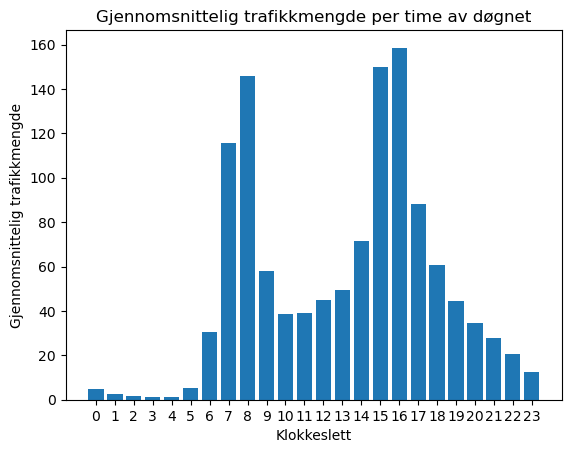

In [78]:
barplot(
    df = merged_df, 
    x_column = "Klokkeslett", 
    y_column = "Trafikkmengde", 
    x_label = "Klokkeslett", 
    y_label = "Gjennomsnittelig trafikkmengde", 
    title = 'Gjennomsnittelig trafikkmengde per time av døgnet'
    )

#### Sykkelturer etter ukedag

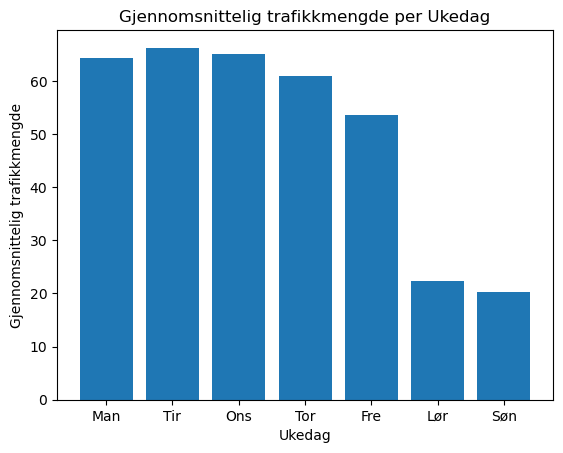

In [79]:
barplot(
    df = merged_df, 
    x_column = "Ukedag", 
    y_column = "Trafikkmengde", 
    x_label = "Ukedag", 
    y_label = "Gjennomsnittelig trafikkmengde", 
    title = 'Gjennomsnittelig trafikkmengde per Ukedag',
    x_labels = ["Man", "Tir", "Ons", "Tor", "Fre", "Lør", "Søn"]
    )

#### Sykkelturer etter måned

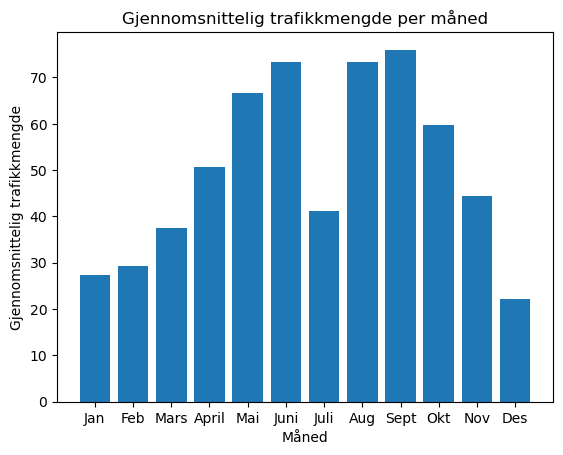

In [80]:
barplot(
    df = merged_df, 
    x_column = "Maaned", 
    y_column = "Trafikkmengde", 
    x_label = "Måned", 
    y_label = "Gjennomsnittelig trafikkmengde", 
    title = 'Gjennomsnittelig trafikkmengde per måned',
    x_labels = ["Jan", "Feb", "Mars", "April", "Mai", "Juni", "Juli", "Aug", "Sept", "Okt", "Nov", "Des"]
    )

#### Sykkelturer etter år

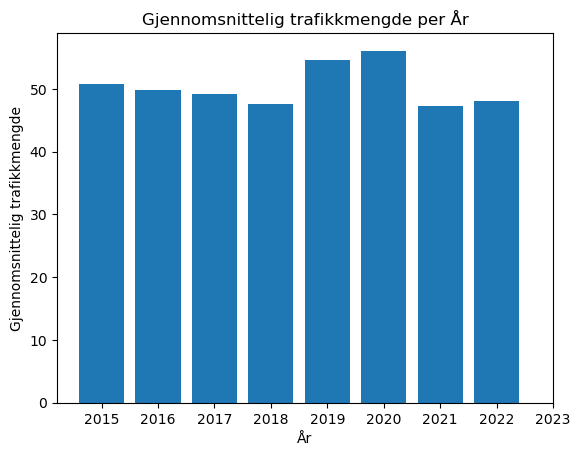

In [81]:
barplot(
    df = merged_df, 
    x_column = "Aar", 
    y_column = "Trafikkmengde", 
    x_label = "År", 
    y_label = "Gjennomsnittelig trafikkmengde", 
    title = 'Gjennomsnittelig trafikkmengde per År'
    )

In [82]:
merged_df.to_csv('merged_data.csv', index=False)